In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
cod = pd.read_csv('data/cod.csv')

In [4]:
cod.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [5]:
cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [6]:
cod.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


In [7]:
cod['Ratio_shots_hit'] = cod.hits/cod.shots
cod['Ratio_shots_missed'] = cod.misses/cod.shots
cod['Ratio_headshots'] = cod.headshots/cod.shots

In [8]:
cod_low_level = cod[cod.level<=50]
cod_Mid_level = cod[(cod.level>50) & (cod.level<=100)]
cod_High_level = cod[(cod.level>100) & (cod.level<=200)]
cod_gods = cod[cod.level>200]

<Axes: xlabel='wins', ylabel='timePlayed'>

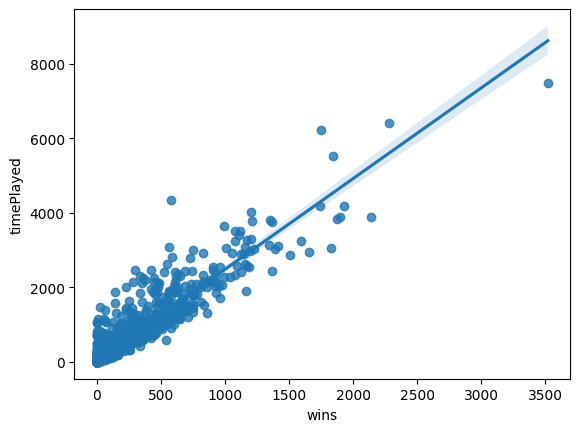

In [9]:
sns.regplot(x='wins', y='timePlayed', data=cod)

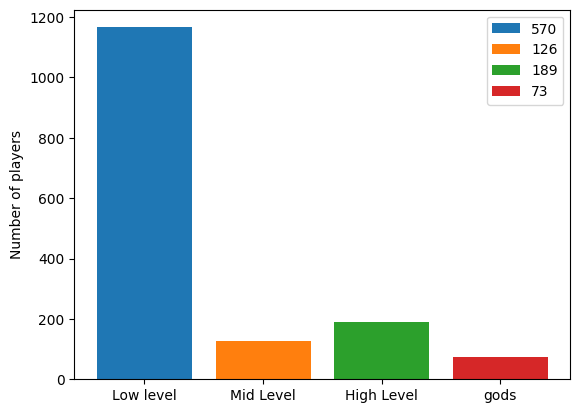

In [10]:
fig, ax = plt.subplots()
ax1=ax.bar('Low level',cod_low_level.count())
ax2=ax.bar('Mid Level',cod_Mid_level.count())
ax3=ax.bar('High Level',cod_High_level.count())
ax4=ax.bar('gods',cod_gods.count())
ax.set_ylabel('Number of players')
ax.legend((ax1,ax2,ax3,ax4), (str(cod_low_level['Ratio_shots_missed'].count()),str(cod_Mid_level['Ratio_shots_missed'].count()),str(cod_High_level['Ratio_shots_missed'].count()),str(cod_gods['Ratio_shots_missed'].count())),loc='best')
plt.show()

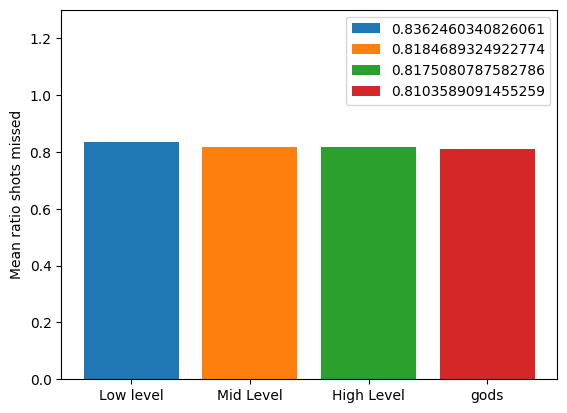

In [11]:
fig, ax = plt.subplots()
ax1=ax.bar('Low level', cod_low_level['Ratio_shots_missed'].mean())
ax2=ax.bar('Mid Level', cod_Mid_level['Ratio_shots_missed'].mean())
ax3=ax.bar('High Level', cod_High_level['Ratio_shots_missed'].mean())
ax4=ax.bar('gods', cod_gods['Ratio_shots_missed'].mean())
ax.set_ylabel('Mean ratio shots missed')
ax.set_ylim(0,1.3)
ax.legend((ax1,ax2,ax3,ax4), (str(cod_low_level['Ratio_shots_missed'].mean()),str(cod_Mid_level['Ratio_shots_missed'].mean()),str(cod_High_level['Ratio_shots_missed'].mean()),str(cod_gods['Ratio_shots_missed'].mean())),loc='best')
plt.show()

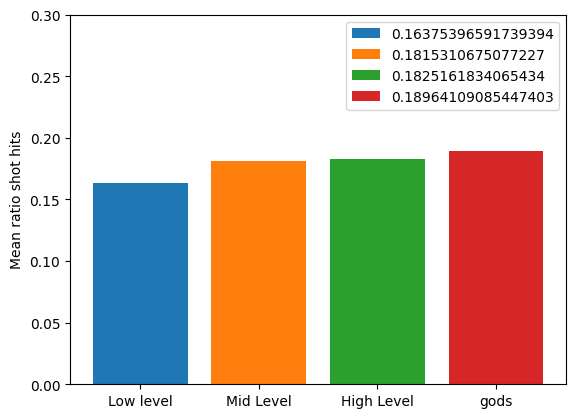

In [12]:
fig, ax = plt.subplots()
ax1=ax.bar('Low level', cod_low_level['Ratio_shots_hit'].mean())
ax2=ax.bar('Mid Level', cod_Mid_level['Ratio_shots_hit'].mean())
ax3=ax.bar('High Level', cod_High_level['Ratio_shots_hit'].mean())
ax4=ax.bar('gods', cod_gods['Ratio_shots_hit'].mean())
ax.legend((ax1,ax2,ax3,ax4), (str(cod_low_level['Ratio_shots_hit'].mean()),str(cod_Mid_level['Ratio_shots_hit'].mean()),str(cod_High_level['Ratio_shots_hit'].mean()),str(cod_gods['Ratio_shots_hit'].mean())))
ax.set_ylabel('Mean ratio shot hits')
ax.set_ylim(0,0.3)
plt.show()

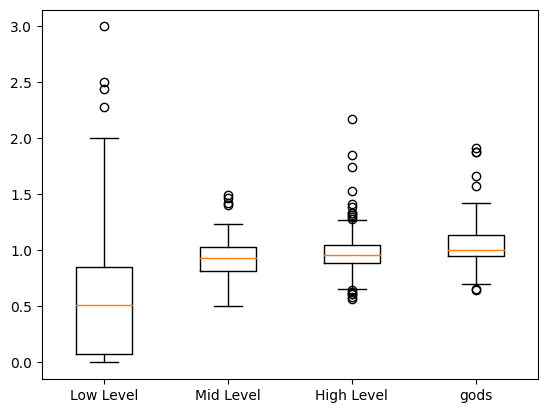

In [13]:
data = [cod_low_level['kdRatio'], cod_Mid_level['kdRatio'], cod_High_level['kdRatio'], cod_gods['kdRatio']]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Low Level', 'Mid Level', 'High Level', 'gods'])
plt.show()

In [14]:
low_level_high_kd = cod_low_level[cod_low_level['kdRatio'] > 2]
low_level_high_kd

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,...,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Ratio_shots_hit,Ratio_shots_missed,Ratio_headshots
149,b5 bigwill#3505460,3,57,2.2800,4,9,1,0,68,10,...,1,3,216,43250,33.480000,284,25,0.239437,0.760563,0.038732
1201,black bird#2033672,19,2730,2.4375,19,38,7,9,5863,69,...,38,539,26327,476365,199.347826,32190,1120,0.182137,0.817863,0.017397
1264,Shadow9World#3013168,1,65,2.5000,8,3,1,20,197,3,...,2,9,578,8825,226.400000,775,26,0.254194,0.745806,0.043871
1301,Lucky_#3820176,0,3,3.0000,0,1,0,0,0,1,...,0,0,0,2250,0.000000,0,1,NaN,NaN,inf


In [15]:
low_level_high_kd = low_level_high_kd.iloc[:3]
low_level_high_kd

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,...,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Ratio_shots_hit,Ratio_shots_missed,Ratio_headshots
149,b5 bigwill#3505460,3,57,2.2800,4,9,1,0,68,10,...,1,3,216,43250,33.480000,284,25,0.239437,0.760563,0.038732
1201,black bird#2033672,19,2730,2.4375,19,38,7,9,5863,69,...,38,539,26327,476365,199.347826,32190,1120,0.182137,0.817863,0.017397
1264,Shadow9World#3013168,1,65,2.5000,8,3,1,20,197,3,...,2,9,578,8825,226.400000,775,26,0.254194,0.745806,0.043871


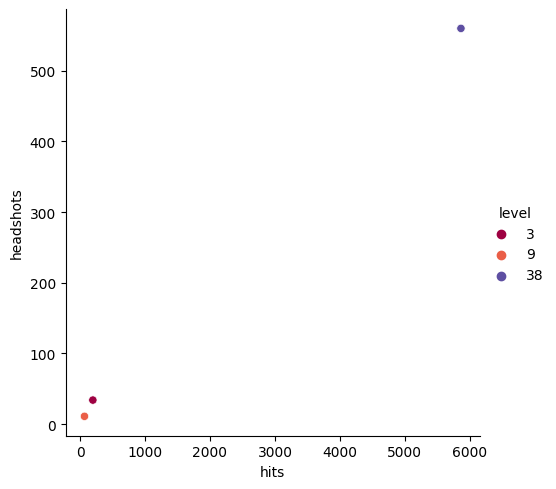

In [16]:
sns.relplot(x='hits', y='headshots', hue='level', data=low_level_high_kd, palette='Spectral', kind='scatter')

In [17]:
mid_level_outliers=cod_Mid_level[cod_Mid_level['kdRatio'] > 1.2]
mid_level_outliers

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,...,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Ratio_shots_hit,Ratio_shots_missed,Ratio_headshots
12,CzarnyDelfinek#9059572,188,1949,1.495779,22,53,4,57,3333,409,...,25,150,10511,909543,38.630318,13844,1303,0.240754,0.759246,0.038717
205,SmashedDolphins#6984385,145,5894,1.407018,14,57,14,111,23155,438,...,227,990,68422,979910,259.961644,91577,4189,0.252847,0.747153,0.012722
494,Aeztka#2790735,388,11904,1.211603,19,98,9,28,33705,820,...,271,1246,183137,1496304,228.628537,216842,9825,0.155436,0.844564,0.015039
1071,ShadowMaster#7759491,139,6984,1.425306,18,67,17,24,23888,408,...,191,1094,77479,1092883,212.739706,101367,4900,0.235659,0.764341,0.012114
1144,Kriszma#6172406,108,3990,1.467451,17,84,17,110,13319,402,...,88,619,44122,1294200,89.826866,57441,2719,0.231873,0.768127,0.008583
1450,Apecs,189,6844,1.233153,13,65,13,13,27643,457,...,258,1325,111967,1071813,296.745295,139610,5550,0.198002,0.801998,0.008151


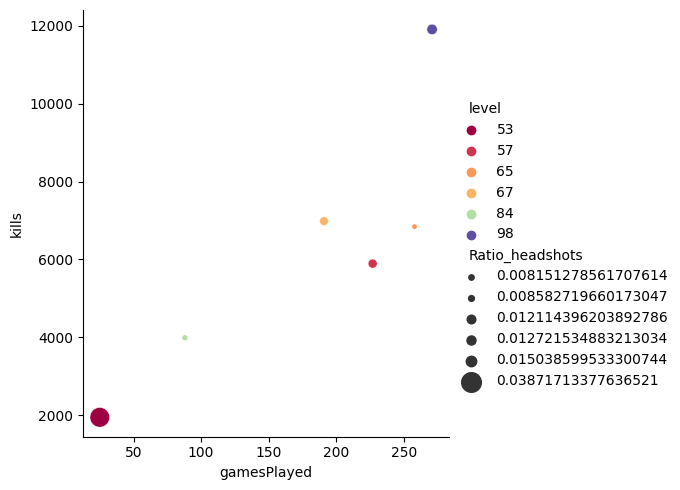

In [18]:
sns.relplot(x='gamesPlayed',y='kills', hue='level', size='Ratio_headshots', data=mid_level_outliers, palette='Spectral', sizes=(15, 200), kind='scatter')